In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
# Specify filepaths and filenames.
filepath = '/home/jovyan/ML_MB_Norway_data/'
filename = '2023-06-01_stake_mb_norway_cleaned_ids_latlon_wattributes_climate.csv'

# Load data.
data = pd.read_csv(filepath + filename)

data
data.columns

Index(['RGIID', 'GLIMSID', 'BREID', 'utm_zone', 'utm_east_approx',
       'utm_north_approx', 'altitude_approx', 'location_description',
       'location_id', 'stake_no',
       ...
       'tp_jan', 'tp_feb', 'tp_mar', 'tp_apr', 'tp_may', 'tp_jun', 'tp_jul',
       'tp_aug', 'tp_sep', 'altitude_climate'],
      dtype='object', length=205)

In [3]:
# Make year column
data['year']=pd.to_datetime(data['dt_curr_year_max_date'].astype('string'), format="%d.%m.%Y %H:%M")
data['year'] = data.year.dt.year.astype('Int64')

In [4]:
# Get data for Nigardsbreen
glacier_data_all = data.loc[data['RGIID']=='RGI60-08.01126']

glacier_data_all
# 950 point measurements

,RGIID,GLIMSID,BREID,utm_zone,utm_east_approx,utm_north_approx,altitude_approx,location_description,location_id,stake_no,...,tp_feb,tp_mar,tp_apr,tp_may,tp_jun,tp_jul,tp_aug,tp_sep,altitude_climate,year
1930,RGI60-08.01126,G007099E61715N,2297,32,402750.0,6841500.0,990.0,NaN,N1000,N1000,...,0.003761,0.003825,0.004330,0.003294,0.003513,0.003269,0.005247,0.008278,1322.716089,1991
1931,RGI60-08.01126,G007099E61715N,2297,32,402750.0,6841500.0,990.0,NaN,N1000,N1000,...,0.015104,0.005939,0.001753,0.003413,0.005560,0.004863,0.006438,0.003316,1322.716089,1998
1932,RGI60-08.01126,G007099E61715N,2297,32,402750.0,6841500.0,990.0,NaN,N1000,N1000,...,0.011049,0.006357,0.004072,0.003126,0.008577,0.003506,0.005019,0.005079,1322.716089,2000
1933,RGI60-08.01126,G007099E61715N,2297,32,402750.0,6841500.0,990.0,NaN,N1000,N100000,...,0.004909,0.002112,0.004616,0.003036,0.004256,0.005699,0.006093,0.002317,1322.716089,2001
1934,RGI60-08.01126,G007099E61715N,2297,32,402750.0,6841500.0,990.0,NaN,N1000,N100002,...,0.007848,0.007098,0.001808,0.002955,0.005540,0.005827,0.003137,0.004228,1322.716089,2002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,RGI60-08.01126,G007099E61715N,2297,32,401670.0,6847020.0,1800.0,NaN,N99,N9968,...,0.001709,0.003372,0.002184,0.002967,0.003059,0.007892,0.003663,0.006336,1382.210502,1970
2876,RGI60-08.01126,G007099E61715N,2297,32,400520.0,6842250.0,1555.0,NaN,NaN,NA63,...,0.001372,0.001987,0.002171,0.004079,0.002198,0.006389,0.005554,0.009834,1382.210502,1963
2877,RGI60-08.01126,G007099E61715N,2297,32,400350.0,6842570.0,1579.0,NaN,NC,NC63,...,0.001372,0.001987,0.002171,0.004079,0.002198,0.006389,0.005554,0.009834,1382.210502,1963
2878,RGI60-08.01126,G007099E61715N,2297,32,400260.0,6840930.0,1612.0,NaN,NF,NF62,...,0.008417,0.001199,0.001869,0.001849,0.004311,0.001448,0.006092,0.005234,1382.210502,1962


In [5]:
# Select columns

base_cols = ['balance_netto','year','lat','lon','altitude','aspect','slope','slope_factor','altitude_climate']
temp_cols = ['t2m_oct','t2m_nov','t2m_des','t2m_jan','t2m_feb','t2m_mar','t2m_apr','t2m_may','t2m_jun','t2m_jul','t2m_aug','t2m_sep']
prec_cols = ['tp_oct','tp_nov','tp_des','tp_jan','tp_feb','tp_mar','tp_apr','tp_may','tp_jun','tp_jul','tp_aug','tp_sep']

cols = [y for x in [base_cols, temp_cols, prec_cols] for y in x]
cols

['balance_netto',
 'year',
 'lat',
 'lon',
 'altitude',
 'aspect',
 'slope',
 'slope_factor',
 'altitude_climate',
 't2m_oct',
 't2m_nov',
 't2m_des',
 't2m_jan',
 't2m_feb',
 't2m_mar',
 't2m_apr',
 't2m_may',
 't2m_jun',
 't2m_jul',
 't2m_aug',
 't2m_sep',
 'tp_oct',
 'tp_nov',
 'tp_des',
 'tp_jan',
 'tp_feb',
 'tp_mar',
 'tp_apr',
 'tp_may',
 'tp_jun',
 'tp_jul',
 'tp_aug',
 'tp_sep']

In [6]:
# Select columns for Nigardsbreen
glacier_data = glacier_data_all[cols]

# Reset index of new dataframe
glacier_data.reset_index(drop=True, inplace=True)

glacier_data

,balance_netto,year,lat,lon,altitude,aspect,slope,slope_factor,altitude_climate,t2m_oct,...,tp_des,tp_jan,tp_feb,tp_mar,tp_apr,tp_may,tp_jun,tp_jul,tp_aug,tp_sep
0,-4.11,1991,61.694315,7.161649,974.0,2.465503,0.152608,3.089254,1322.716089,270.932251,...,0.007378,0.003445,0.003761,0.003825,0.004330,0.003294,0.003513,0.003269,0.005247,0.008278
1,-3.96,1998,61.694304,7.161498,1000.0,2.333727,0.143458,3.206009,1322.716089,268.193298,...,0.003372,0.005719,0.015104,0.005939,0.001753,0.003413,0.005560,0.004863,0.006438,0.003316
2,-3.70,2000,61.696900,7.158885,1019.0,2.962544,0.131003,3.385560,1322.716089,269.597687,...,0.005705,0.012997,0.011049,0.006357,0.004072,0.003126,0.008577,0.003506,0.005019,0.005079
3,-4.48,2001,61.694526,7.161315,974.0,2.333727,0.143458,3.206009,1322.716089,273.114014,...,0.002565,0.001720,0.004909,0.002112,0.004616,0.003036,0.004256,0.005699,0.006093,0.002317
4,-5.00,2002,61.693602,7.162674,962.0,2.401391,0.163659,2.962348,1322.716089,272.787598,...,0.003626,0.006165,0.007848,0.007098,0.001808,0.002955,0.005540,0.005827,0.003137,0.004228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.79,1970,61.743600,7.138086,1802.0,3.604919,0.086527,3.872423,1382.210502,271.784027,...,0.002970,0.001482,0.001709,0.003372,0.002184,0.002967,0.003059,0.007892,0.003663,0.006336
946,0.11,1963,61.700462,7.118957,1555.0,1.553582,0.192326,2.688917,1382.210502,271.547150,...,0.003986,0.002619,0.001372,0.001987,0.002171,0.004079,0.002198,0.006389,0.005554,0.009834
947,0.14,1963,61.703289,7.115569,1579.0,1.166986,0.140746,3.242939,1382.210502,271.547150,...,0.003986,0.002619,0.001372,0.001987,0.002171,0.004079,0.002198,0.006389,0.005554,0.009834
948,2.80,1962,61.693873,7.116522,1579.0,1.417386,0.232371,2.400438,1382.210502,272.531006,...,0.004000,0.008896,0.008417,0.001199,0.001869,0.001849,0.004311,0.001448,0.006092,0.005234


In [141]:
# Select time period
#start_yr = 1962
#end_yr = 1981

#glacier_data = glacier_data[(glacier_data['year']>=start_yr) & (glacier_data['year']<=1981)]

#glacier_data.groupby('year').count()



In [7]:
#glacier_data.reset_index(drop=True, inplace=True)
#glacier_data

In [7]:
# Remove cells with nan in balance_netto.
#glacier_data['balance_netto'].notna()
glacier_data = glacier_data[glacier_data['balance_netto'].notna()]


In [8]:
glacier_data.reset_index(drop=True, inplace=True)
glacier_data

,balance_netto,year,lat,lon,altitude,aspect,slope,slope_factor,altitude_climate,t2m_oct,...,tp_des,tp_jan,tp_feb,tp_mar,tp_apr,tp_may,tp_jun,tp_jul,tp_aug,tp_sep
0,-4.11,1991,61.694315,7.161649,974.0,2.465503,0.152608,3.089254,1322.716089,270.932251,...,0.007378,0.003445,0.003761,0.003825,0.004330,0.003294,0.003513,0.003269,0.005247,0.008278
1,-3.96,1998,61.694304,7.161498,1000.0,2.333727,0.143458,3.206009,1322.716089,268.193298,...,0.003372,0.005719,0.015104,0.005939,0.001753,0.003413,0.005560,0.004863,0.006438,0.003316
2,-3.70,2000,61.696900,7.158885,1019.0,2.962544,0.131003,3.385560,1322.716089,269.597687,...,0.005705,0.012997,0.011049,0.006357,0.004072,0.003126,0.008577,0.003506,0.005019,0.005079
3,-4.48,2001,61.694526,7.161315,974.0,2.333727,0.143458,3.206009,1322.716089,273.114014,...,0.002565,0.001720,0.004909,0.002112,0.004616,0.003036,0.004256,0.005699,0.006093,0.002317
4,-5.00,2002,61.693602,7.162674,962.0,2.401391,0.163659,2.962348,1322.716089,272.787598,...,0.003626,0.006165,0.007848,0.007098,0.001808,0.002955,0.005540,0.005827,0.003137,0.004228
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
908,0.79,1970,61.743600,7.138086,1802.0,3.604919,0.086527,3.872423,1382.210502,271.784027,...,0.002970,0.001482,0.001709,0.003372,0.002184,0.002967,0.003059,0.007892,0.003663,0.006336
909,0.11,1963,61.700462,7.118957,1555.0,1.553582,0.192326,2.688917,1382.210502,271.547150,...,0.003986,0.002619,0.001372,0.001987,0.002171,0.004079,0.002198,0.006389,0.005554,0.009834
910,0.14,1963,61.703289,7.115569,1579.0,1.166986,0.140746,3.242939,1382.210502,271.547150,...,0.003986,0.002619,0.001372,0.001987,0.002171,0.004079,0.002198,0.006389,0.005554,0.009834
911,2.80,1962,61.693873,7.116522,1579.0,1.417386,0.232371,2.400438,1382.210502,272.531006,...,0.004000,0.008896,0.008417,0.001199,0.001869,0.001849,0.004311,0.001448,0.006092,0.005234


In [11]:
#glacier_data.groupby('year').count()


**Train and test split**

We have 913 observations over the period 1962-2021.

We do a random split in time by the index of the measurement (0-912). 

In [9]:
#glaciers_ids_all = np.unique(df_all.index.get_level_values(0).values)

idcs = glacier_data.index.values

glacier_train, glacier_test = train_test_split(idcs, 
                                               train_size=0.7,
                                               test_size=0.3)

df_train_all = glacier_data.loc[glacier_train]
df_test = glacier_data.loc[glacier_test]
df_train_all.shape, df_test.shape

((639, 33), (274, 33))

In [10]:
df_train_all.reset_index(drop=True, inplace=True)
df_train_all

,balance_netto,year,lat,lon,altitude,aspect,slope,slope_factor,altitude_climate,t2m_oct,...,tp_des,tp_jan,tp_feb,tp_mar,tp_apr,tp_may,tp_jun,tp_jul,tp_aug,tp_sep
0,-0.43,1968,61.678249,7.134256,1622.0,0.159165,0.088595,3.872423,1382.210502,269.369202,...,0.009222,0.007661,0.003095,0.009523,0.002494,0.002718,0.004108,0.000913,0.001510,0.004622
1,1.03,1991,61.722059,7.106039,1661.0,2.406334,0.054946,3.872423,1382.210502,270.829010,...,0.007731,0.003689,0.003869,0.003979,0.004431,0.003407,0.003580,0.003428,0.005398,0.008607
2,0.33,2001,61.714844,7.069680,1700.0,0.643797,0.014714,3.872423,1382.210502,272.950043,...,0.002741,0.001800,0.005116,0.002155,0.004629,0.003202,0.004527,0.005939,0.006380,0.002399
3,2.04,2005,61.714837,7.069831,1700.0,0.643797,0.014714,3.872423,1382.210502,271.760468,...,0.011989,0.014635,0.005093,0.002426,0.004841,0.005240,0.004991,0.003525,0.006292,0.009590
4,2.99,1983,61.689842,7.072036,1806.0,1.807279,0.072675,3.872423,1382.210502,271.667877,...,0.006319,0.018087,0.001461,0.006765,0.003107,0.003354,0.003491,0.004492,0.004932,0.006769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,1.67,1965,61.738135,7.129763,1742.0,3.208654,0.068394,3.872423,1382.210502,270.186035,...,0.007933,0.004952,0.003765,0.004185,0.001821,0.000777,0.004347,0.002090,0.004416,0.005844
635,0.25,1963,61.710416,7.098486,1623.0,1.721958,0.058348,3.872423,1382.210502,271.547150,...,0.003986,0.002619,0.001372,0.001987,0.002171,0.004079,0.002198,0.006389,0.005554,0.009834
636,1.14,2000,61.672016,7.158100,1513.0,2.489397,0.100789,3.872423,1322.716089,269.597687,...,0.005705,0.012997,0.011049,0.006357,0.004072,0.003126,0.008577,0.003506,0.005019,0.005079
637,1.09,1973,61.681274,7.098257,1704.0,2.215432,0.071877,3.872423,1382.210502,271.238190,...,0.007618,0.005634,0.009746,0.007133,0.004113,0.005031,0.004352,0.004082,0.005884,0.006266


In [11]:
df_test.reset_index(drop=True, inplace=True)
df_test

,balance_netto,year,lat,lon,altitude,aspect,slope,slope_factor,altitude_climate,t2m_oct,...,tp_des,tp_jan,tp_feb,tp_mar,tp_apr,tp_may,tp_jun,tp_jul,tp_aug,tp_sep
0,2.01,1964,61.715306,7.147381,1448.0,3.009711,0.168181,2.914294,1322.716089,270.994507,...,0.005284,0.006340,0.004899,0.000537,0.003967,0.003778,0.008267,0.007055,0.004840,0.006731
1,1.11,1997,61.677740,7.038092,1958.0,2.823014,0.033728,3.872423,1362.652086,271.500092,...,0.003295,0.006407,0.011799,0.012629,0.006743,0.003224,0.002653,0.004371,0.004133,0.009246
2,1.52,1979,61.711502,7.099743,1625.0,1.621961,0.065486,3.872423,1382.210502,271.196442,...,0.001029,0.002923,0.003478,0.007286,0.002049,0.005014,0.002891,0.004788,0.006794,0.011293
3,1.40,1971,61.736301,7.118419,1689.0,3.833405,0.075065,3.872423,1382.210502,269.625793,...,0.005796,0.006443,0.006475,0.004463,0.004315,0.004096,0.003130,0.003811,0.004685,0.006116
4,1.98,2005,61.708182,7.108990,1608.0,1.233443,0.058360,3.872423,1382.210502,271.760468,...,0.011989,0.014635,0.005093,0.002426,0.004841,0.005240,0.004991,0.003525,0.006292,0.009590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,2.15,1967,61.687016,7.097298,1667.0,1.143880,0.088054,3.872423,1382.210502,269.845184,...,0.005696,0.003222,0.005835,0.013168,0.004009,0.003922,0.005214,0.005991,0.004655,0.002957
270,2.69,1973,61.730634,7.185647,1715.0,3.461930,0.125215,3.478609,1322.716089,271.224518,...,0.007394,0.005398,0.009579,0.006643,0.003932,0.004984,0.004198,0.004016,0.005637,0.006027
271,0.98,1970,61.747474,7.137019,1835.0,3.784995,0.091151,3.872423,1205.468389,272.819489,...,0.002829,0.001492,0.001748,0.003385,0.002067,0.002658,0.002823,0.007479,0.003325,0.005884
272,-1.06,1988,61.706703,7.112486,1600.0,1.850854,0.066241,3.872423,1382.210502,271.582855,...,0.006896,0.004001,0.003978,0.001794,0.005173,0.002037,0.001994,0.008487,0.005749,0.008732


Training set is 639 and test set is 274. 

In [12]:
# Save test and training+validation dataset
df_test.to_csv(filepath + 'train_test/data_test_nigardsbreen.csv')
df_train_all.to_csv(filepath + 'train_test/data_train_all_nigardsbreen.csv')

**Train and validation split**

Training dataset is 639 measurements in total. 

Split in 80% training and 20% validation.

In [13]:
idcs = df_train_all.index.values

train_dataset, validation_dataset = train_test_split(idcs, 
                                                   train_size=0.8,
                                                   test_size=0.2)

df_train = glacier_data.loc[train_dataset]
df_validation = glacier_data.loc[validation_dataset]
df_train.shape, df_validation.shape

((511, 33), (128, 33))

Training set is 511 and test set is 128.

In [14]:
df_validation.reset_index(drop=True, inplace=True)
df_train.reset_index(drop=True, inplace=True)

In [15]:
# Save training and validation dataset
filepath = '/home/jovyan/ML_MB_Norway_data/'

df_train.to_csv(filepath + 'train_test/data_train_nigardsbreen.csv')
df_validation.to_csv(filepath + 'train_test/data_validation_nigardsbreen.csv')


**Run from here (model training with and without cross-validation)**

In [16]:
# Import libraries
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [17]:
# Load training and validation datasets
filepath = '/home/jovyan/ML_MB_Norway_data/'

df_train = pd.read_csv(filepath + 'train_test/data_train_nigardsbreen.csv', index_col=0)
df_validation = pd.read_csv(filepath + 'train_test/data_validation_nigardsbreen.csv', index_col=0)
df_train.shape, df_validation.shape

((511, 33), (128, 33))

In [3]:
df_train

,balance_netto,year,lat,lon,altitude,aspect,slope,slope_factor,t2m_oct,t2m_nov,...,tp_des,tp_jan,tp_feb,tp_mar,tp_apr,tp_may,tp_jun,tp_jul,tp_aug,tp_sep
0,0.96,1998,61.707499,7.110905,1605.0,1.450496,0.059921,3.872423,268.099152,264.898621,...,0.003584,0.005943,0.015570,0.006104,0.001757,0.003486,0.005892,0.005191,0.006725,0.003467
1,-0.40,1978,61.711812,7.207413,1580.0,4.563647,0.047101,3.872423,272.619080,265.678253,...,0.005307,0.005669,0.001757,0.003420,0.002051,0.001159,0.004079,0.003817,0.005964,0.007648
2,-1.57,1980,61.702407,7.229255,1600.0,3.615144,0.099227,3.872423,268.785400,264.856110,...,0.006043,0.002322,0.002534,0.001683,0.003321,0.001813,0.004296,0.005359,0.005201,0.008775
3,-11.01,1969,61.677767,7.205721,341.0,2.801395,0.212546,2.532373,268.545532,261.819550,...,0.001483,0.005365,0.002054,0.003026,0.003460,0.001860,0.001995,0.006970,0.002270,0.009657
4,-0.59,1974,61.673418,7.160832,1528.0,1.843503,0.094491,3.872423,267.981476,262.598419,...,0.010480,0.006196,0.004864,0.000416,0.001339,0.001682,0.002594,0.005909,0.006567,0.007737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,2.05,1964,61.680122,7.115659,1649.0,2.221070,0.102215,3.872423,270.912506,263.983856,...,0.005439,0.006454,0.005130,0.000585,0.004163,0.003896,0.008467,0.007440,0.005040,0.007061
507,1.88,2015,61.707443,7.104250,1612.0,1.417727,0.029764,3.872423,272.853638,267.876709,...,0.009461,0.010069,0.007443,0.007735,0.004824,0.005037,0.005207,0.006530,0.004992,0.003285
508,-6.08,2014,61.693774,7.162097,959.0,2.465503,0.152608,3.089254,272.706360,266.325806,...,0.010648,0.001821,0.004338,0.008392,0.004375,0.002483,0.003597,0.006292,0.005197,0.004914
509,-1.05,1969,61.681549,7.092853,1717.0,2.093312,0.061540,3.872423,268.541718,262.040466,...,0.001538,0.005657,0.002251,0.003153,0.003520,0.001913,0.002004,0.007230,0.002486,0.009946


In [18]:
df_train.altitude.min(), df_train.altitude.max()
#df_validation.altitude.min(), df_validation.altitude.max()

(314.0, 1984.0)

In [19]:
features_to_drop = ['balance_netto', 'year', 'lat', 'lon']

df_train_X = df_train.drop(features_to_drop, axis=1)
df_train_y = df_train[['balance_netto']]

X_train, y_train = df_train_X.values, df_train_y.values

# And the same for test set
df_validation_X = df_validation.drop(features_to_drop, axis=1)
df_validation_y = df_validation[['balance_netto']]

X_validation, y_validation = df_validation_X.values, df_validation_y.values

In [20]:
X_validation.shape, y_validation.shape

((128, 29), (128, 1))

In [21]:
X_train.shape, y_train.shape

((511, 29), (511, 1))

In [22]:
def plot_prediction(y1, y2, data_type:str, n_toplot=10**10):
    
    from scipy.stats import gaussian_kde
    from sklearn.metrics import r2_score, mean_squared_error
    
    idxs = np.arange(len(y1))
    np.random.shuffle(idxs)
    
    y_expected = y1.reshape(-1)[idxs[:n_toplot]]
    y_predicted = y2.reshape(-1)[idxs[:n_toplot]]

    xy = np.vstack([y_expected, y_predicted])
    z = gaussian_kde(xy)(xy)
    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()
    y_plt, ann_plt, z = y_expected[idx], y_predicted[idx], z[idx]
    
    plt.figure(figsize=(8,8))
    plt.title("Model Evaluation " + data_type, fontsize=17)
    plt.ylabel('Modeled SMB (m.w.e)', fontsize=16)
    plt.xlabel('Reference SMB (m.w.e)', fontsize=16)
    sc = plt.scatter(y_plt, ann_plt, c=z, s=20)
    plt.clim(0,0.4)
    plt.tick_params(labelsize=14)
    plt.colorbar(sc) 
    lineStart = -15
    lineEnd = 8
    plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-')
    plt.axvline(0.0, ls='-.', c='k')
    plt.axhline(0.0, ls='-.', c='k')
    plt.xlim(lineStart, lineEnd)
    plt.ylim(lineStart, lineEnd)
    plt.gca().set_box_aspect(1)
    
    textstr = '\n'.join((
    r'$RMSE=%.2f$' % (mean_squared_error(y_expected, y_predicted), ),
    r'$R^2=%.2f$' % (r2_score(y_expected, y_predicted), )))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    # place a text box in upper left in axes coords
    plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    
    plt.show()

**Linear regression**

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

In [24]:
# StandardScaler(): Standardize features by removing the mean and scaling to unit variance.
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [25]:
X_train_scaled = scaler.transform(X_train)
X_validation_scaled = scaler.transform(X_validation)

In [26]:
# ElasticNet: Linear regression with combined L1 and L2 priors as regularizer.

%time
reg_linear = ElasticNet(alpha=0.001, #0.001
                        l1_ratio=0.8,
                        fit_intercept=True, 
                        random_state=666)
reg_linear.fit(X_train_scaled, y_train)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs


ElasticNet(alpha=0.001, l1_ratio=0.8, random_state=666)

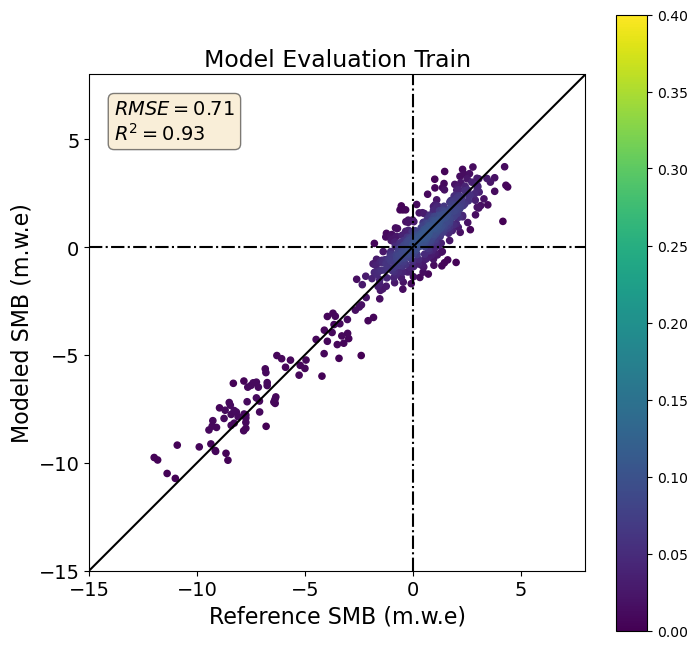

In [27]:
plot_prediction(y_train, reg_linear.predict(X_train_scaled), 'Train', n_toplot=5000)

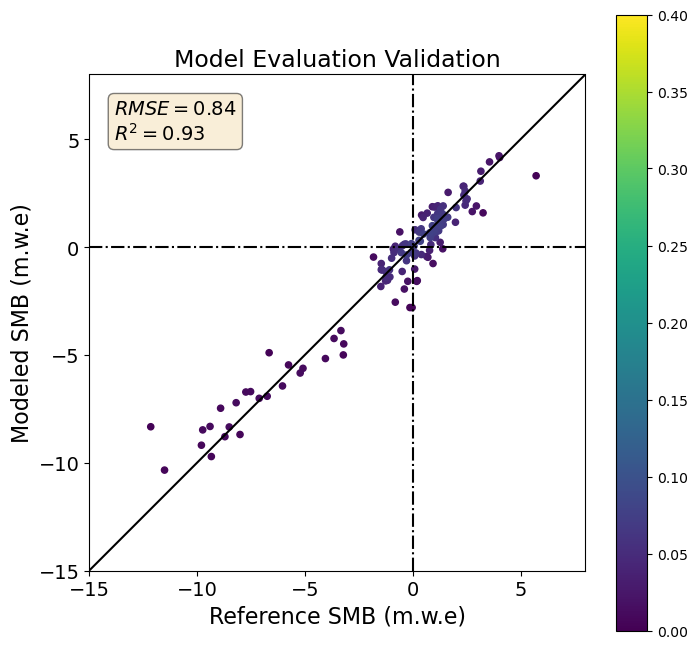

In [28]:
plot_prediction(y_validation, reg_linear.predict(X_validation_scaled), 'Validation', n_toplot=5000)

In [29]:
elastic= ElasticNetCV(l1_ratio = [0.001,0.005,0.01,0.03,0.07,0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9,0.95, 1],
                      alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3,6],
                      max_iter = 50000, 
                      cv = 10,
                      tol=0.001)

elastic.fit(X_train_scaled,y_train)

/home/jovyan/envs/oggm_env/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ElasticNetCV(alphas=[0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03,
                     0.06, 0.1, 0.3, 0.6, 1, 3, 6],
             cv=10,
             l1_ratio=[0.001, 0.005, 0.01, 0.03, 0.07, 0.1, 0.3, 0.5, 0.6, 0.7,
                       0.8, 0.85, 0.9, 0.95, 1],
             max_iter=50000, tol=0.001)

In [18]:
elastic.l1_ratio_, elastic.alpha_

(0.7, 0.003)

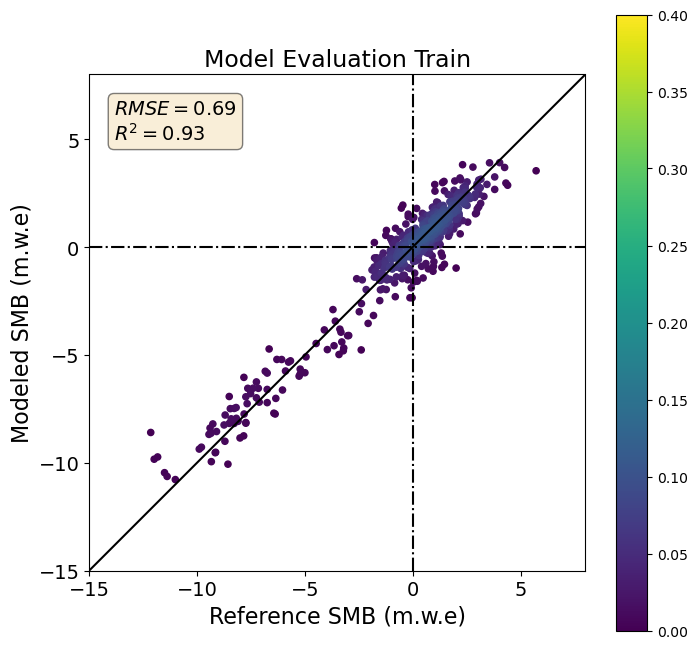

In [68]:
plot_prediction(y_train, elastic.predict(X_train_scaled), 'Train', n_toplot=5000)

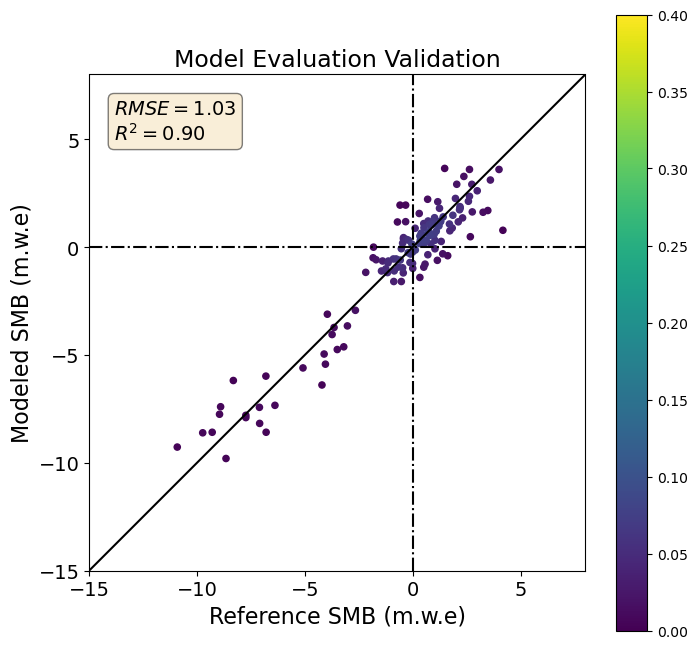

In [69]:
plot_prediction(y_validation, elastic.predict(X_validation_scaled), 'Validation', n_toplot=5000)

**Decision tree**

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [22]:
%%time
reg_tree = DecisionTreeRegressor(random_state=0, 
                                 max_depth=4, 
                                 min_samples_split=5)

reg_tree.fit(X_train, y_train)

CPU times: user 4.56 ms, sys: 323 µs, total: 4.89 ms
Wall time: 4.31 ms


DecisionTreeRegressor(max_depth=4, min_samples_split=5, random_state=0)

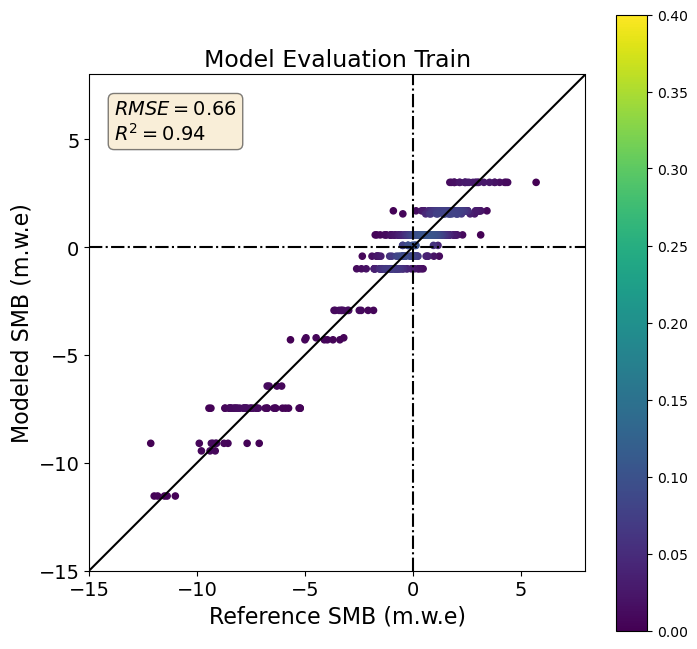

In [70]:
plot_prediction(y_train, reg_tree.predict(X_train), 'Train', n_toplot=5000)

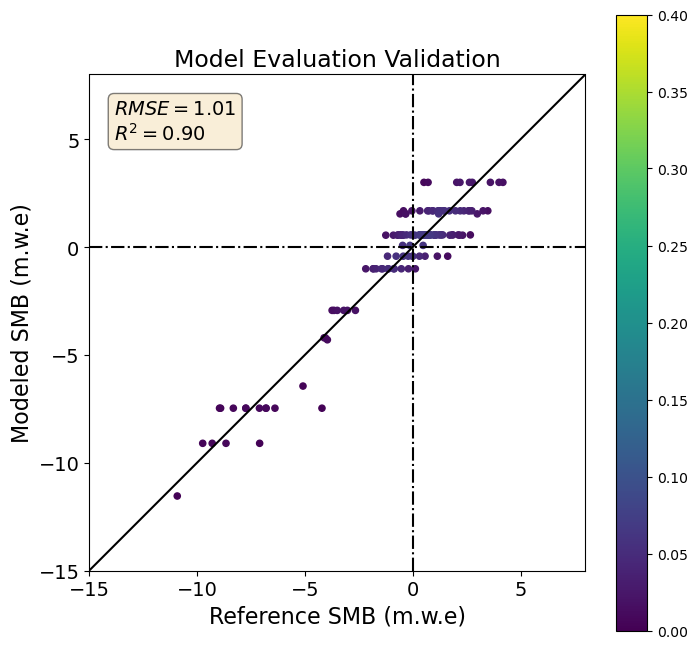

In [71]:
plot_prediction(y_validation, reg_tree.predict(X_validation), 'Validation', n_toplot=5000)

**Ensemble of trees**

In [28]:
from sklearn import ensemble
from sklearn.inspection import permutation_importance

In [95]:
model = 'random forest'
#model = 'gradient boosting'

if model == 'gradient boosting':

    params = {
        "n_estimators": 50,
        "max_depth": 4,
        "min_samples_split": 5,
        "learning_rate": 0.1,
        "loss": 'squared_error',#'huber', #"squared_error",
        "validation_fraction": 0.2
    }
    reg_ensemble = ensemble.GradientBoostingRegressor(**params)
    
elif model == 'random forest':
    
    params = {
        "n_estimators": 100,
        "max_depth": 4,
        "min_samples_split": 5,
        "criterion": "absolute_error",
        'max_features': 30,
    }
    reg_ensemble = ensemble.RandomForestRegressor(**params)

In [96]:
%%time
reg_ensemble.fit(X_train, y_train)

<timed eval>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


CPU times: user 2.04 s, sys: 0 ns, total: 2.04 s
Wall time: 2.04 s


RandomForestRegressor(criterion='absolute_error', max_depth=4, max_features=30,
                      min_samples_split=5)

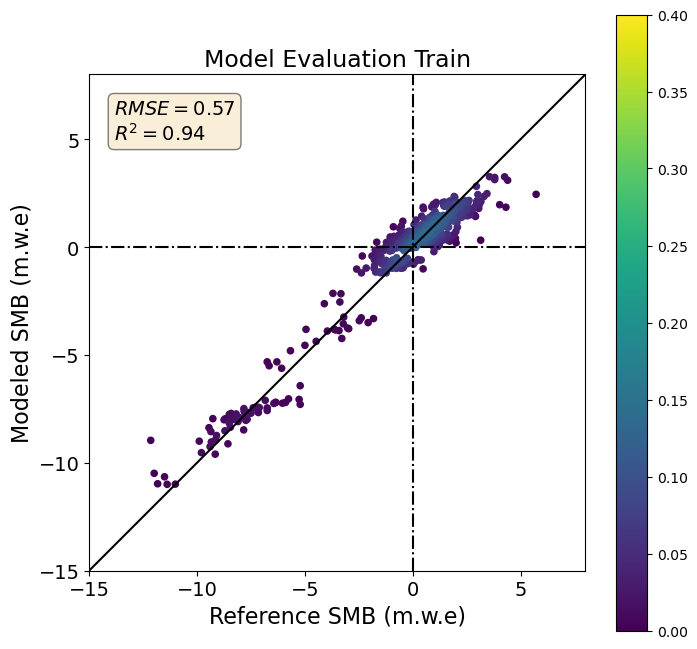

In [97]:
plot_prediction(y_train, reg_ensemble.predict(X_train), 'Train',n_toplot=5000)

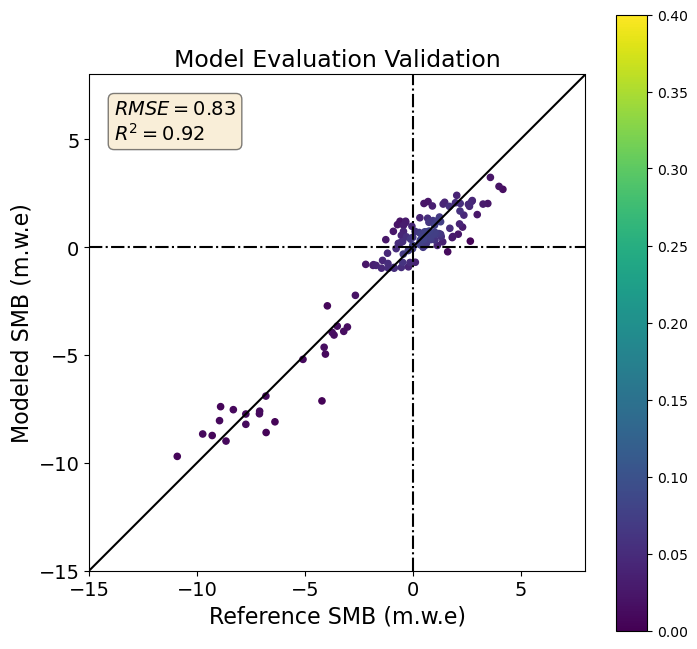

In [99]:
plot_prediction(y_validation, reg_ensemble.predict(X_validation), 'Validation', n_toplot=5000)

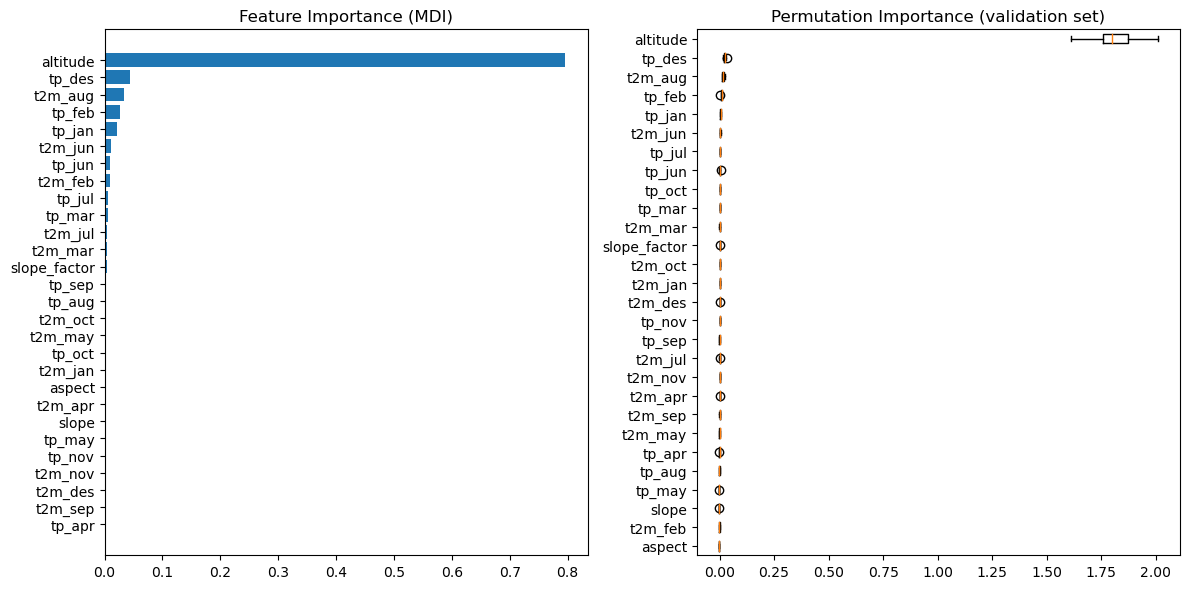

In [100]:
feature_importance = reg_ensemble.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(df_validation_X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg_ensemble, X_validation, y_validation, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(df_validation_X.columns)[sorted_idx],
)
plt.title("Permutation Importance (validation set)")
fig.tight_layout()
plt.show()

**XGBoost**

In [46]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [108]:
# Grid search with range of hyperparameter values to find best performing
# parameter set.

xgb_model = xgb.XGBRegressor()

clf = GridSearchCV(xgb_model, {'max_depth': [2, 3, 4, 5, 6, 7, 8],
                               'n_estimators': [50, 100, 150, 200, 250, 300],
                              'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2]}, 
                   cv=10,
                   verbose=1,
                   n_jobs=4,
                   scoring='neg_mean_squared_error')

# Fit model
clf.fit(X_train, y_train)

print(clf.best_score_)
print(clf.best_params_)

Fitting 10 folds for each of 294 candidates, totalling 2940 fits
-0.4612829088726375
{'learning_rate': 0.15, 'max_depth': 4, 'n_estimators': 200}


In [55]:
#dtrain = xgb.DMatrix(X_train, label=y_train)
#param = {'max_depth':4, 'learning_rate':0.1, 'n_estimators': 200}
#param = {'max_depth':4, 'learning_rate':0.15, 'n_estimators':200}
#num_round = 2

In [109]:
from sklearn.model_selection import cross_val_predict as cvp
from sklearn.model_selection import cross_val_score

xgb_model = xgb.XGBRegressor(max_depth = 4,
                             n_estimators = 200,
                             learning_rate = 0.15)
#res = xgb.cv(param, dtrain, nfold=10,
#             metrics={'error'})#, #seed=0,
             #callbacks=[xgb.callback.EvaluationMonitor(show_stdv=False),
             #           xgb.callback.EarlyStopping(3)])
        
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import KFold

# define model evaluation method
#cv = KFold(n_splits=10, random_state=1)
# evaluate model
#scores = cross_val_score(xgb_model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
#scores = absolute(scores)
#print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

print(cross_val_score(xgb_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))

y_pred = cvp(xgb_model, X_train, y_train, cv=10, n_jobs = 2)#, fit_params = param)

#xgb_model.fit(X_train, y_train)

[-0.72202208 -0.46383616 -0.42597696 -0.55740687 -0.39310628 -0.37254518
 -0.4926566  -0.42285933 -0.41246812 -0.34995151]


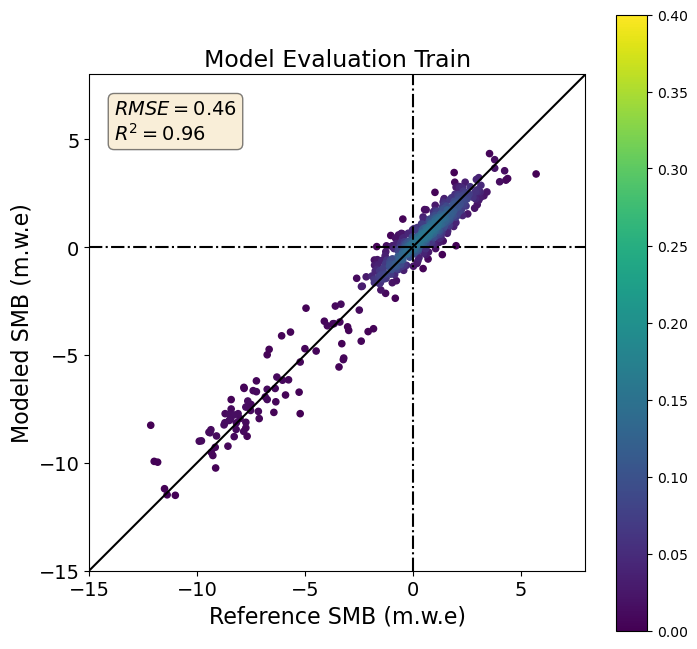

In [110]:
plot_prediction(y_train, y_pred, 'Train', n_toplot=5000)


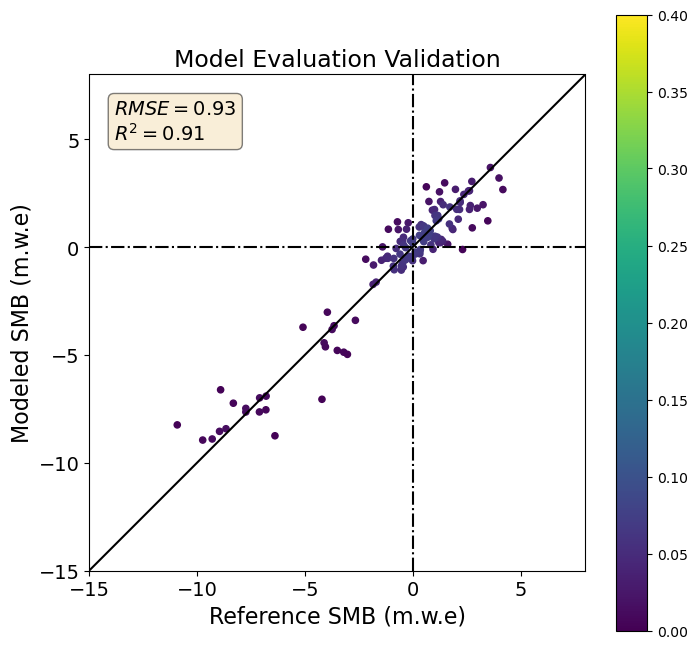

[-1.49845393 -1.1615033  -0.60158447 -1.03936672 -0.83499259 -1.14844282
 -0.80127111 -0.3197249  -0.8057745  -1.06973059]


In [111]:
y_pred_val = cvp(xgb_model, X_validation, y_validation, cv=10, n_jobs = 2)#, fit_params = param)

plot_prediction(y_validation, y_pred_val, 'Validation', n_toplot=5000)

print(cross_val_score(xgb_model, X_validation, y_validation, cv=10, scoring='neg_mean_squared_error'))


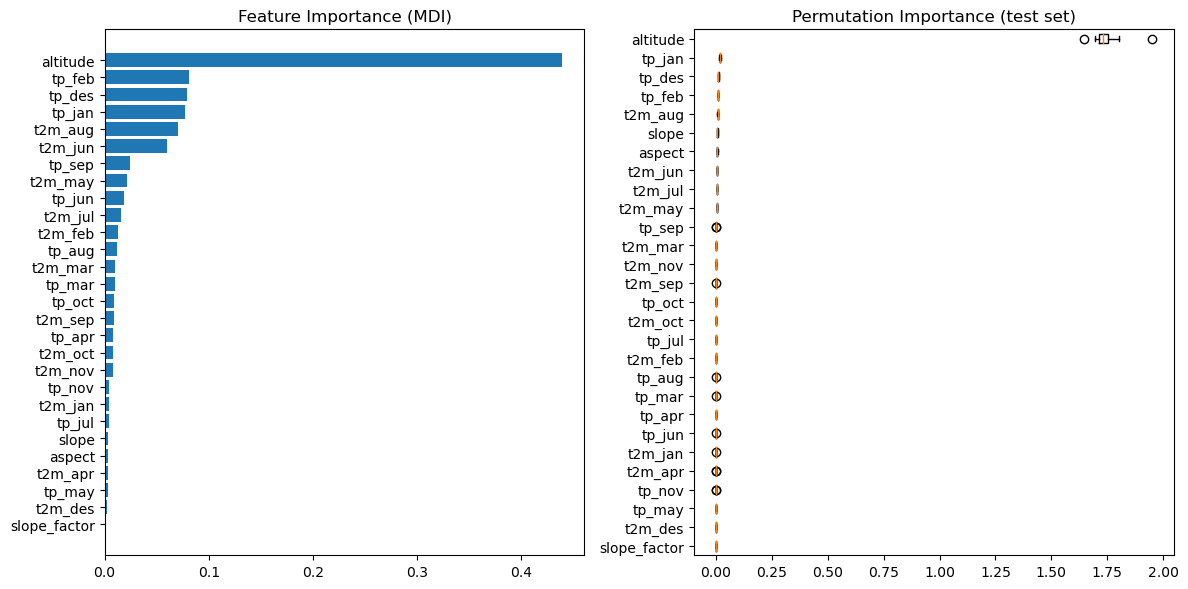

In [113]:
#sorted_idx = xgb_model.feature_importances_.argsort()
#plt.barh(boston.feature_names[sorted_idx], xgb_model.feature_importances_[sorted_idx])
#plt.xlabel("Xgboost Feature Importance")
from sklearn.inspection import permutation_importance


xgb_model.fit(X_train, y_train)
feature_importance = xgb_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(df_train_X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    xgb_model, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(df_train_X.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

## Cross validation with train/test split for Nigardsbreen - Run from here

Using cross-validation with only training and testing datasets

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [86]:
# Load training and validation datasets
filepath = '/home/jovyan/ML_MB_Norway_data/'

df_train_orig = pd.read_csv(filepath + 'train_test/data_train_nigardsbreen.csv', index_col=0)
df_validation_orig = pd.read_csv(filepath + 'train_test/data_validation_nigardsbreen.csv', index_col=0)
df_test = pd.read_csv(filepath + 'train_test/data_test_nigardsbreen.csv', index_col=0)

df_train = pd.concat([df_train_orig, df_validation_orig])

In [87]:
features_to_drop = ['balance_netto', 'year', 'lat', 'lon']

df_train_X = df_train.drop(features_to_drop, axis=1)
df_train_y = df_train[['balance_netto']]

X_train, y_train = df_train_X.values, df_train_y.values

df_test_X = df_test.drop(features_to_drop, axis=1)
df_test_y = df_test[['balance_netto']]

X_test, y_test = df_test_X.values, df_test_y.values

In [5]:
def plot_prediction(y1, y2, data_type:str, n_toplot=10**10):
    
    from scipy.stats import gaussian_kde
    from sklearn.metrics import r2_score, mean_squared_error
    
    idxs = np.arange(len(y1))
    np.random.shuffle(idxs)
    
    y_expected = y1.reshape(-1)[idxs[:n_toplot]]
    y_predicted = y2.reshape(-1)[idxs[:n_toplot]]

    xy = np.vstack([y_expected, y_predicted])
    z = gaussian_kde(xy)(xy)
    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()
    y_plt, ann_plt, z = y_expected[idx], y_predicted[idx], z[idx]
    
    plt.figure(figsize=(8,8))
    plt.title("Model Evaluation " + data_type, fontsize=17)
    plt.ylabel('Modeled SMB (m.w.e)', fontsize=16)
    plt.xlabel('Reference SMB (m.w.e)', fontsize=16)
    sc = plt.scatter(y_plt, ann_plt, c=z, s=20)
    plt.clim(0,0.4)
    plt.tick_params(labelsize=14)
    plt.colorbar(sc) 
    lineStart = -15
    lineEnd = 8
    plt.plot([lineStart, lineEnd], [lineStart, lineEnd], 'k-')
    plt.axvline(0.0, ls='-.', c='k')
    plt.axhline(0.0, ls='-.', c='k')
    plt.xlim(lineStart, lineEnd)
    plt.ylim(lineStart, lineEnd)
    plt.gca().set_box_aspect(1)
    
    textstr = '\n'.join((
    r'$RMSE=%.2f$' % (mean_squared_error(y_expected, y_predicted), ),
    r'$R^2=%.2f$' % (r2_score(y_expected, y_predicted), )))
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    # place a text box in upper left in axes coords
    plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=14,
            verticalalignment='top', bbox=props)
    
    plt.show()

### ElasticNet

Using cross-validation with 10 folds, random split.

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

In [7]:
# StandardScaler(): Standardize features by removing the mean and scaling to unit variance.
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [141]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
elastic= ElasticNetCV(l1_ratio = np.arange(0.01,1,0.05),
                      #l1_ratio = [0.001,0.005,0.01,0.03,0.07,0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9,0.95, 1],
                      #alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3,6],
                      alphas = np.arange(0.001,2,0.001),
                      max_iter = 50000, 
                      cv = 10,
                      tol=0.001)

elastic.fit(X_train_scaled,y_train) # Fit is on grid of alphas and best alpha estimated by cross-validation.

/home/jovyan/envs/oggm_env/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ElasticNetCV(alphas=array([1.000e-03, 2.000e-03, 3.000e-03, ..., 1.997e+00, 1.998e+00,
       1.999e+00]),
             cv=10,
             l1_ratio=array([0.01, 0.06, 0.11, 0.16, 0.21, 0.26, 0.31, 0.36, 0.41, 0.46, 0.51,
       0.56, 0.61, 0.66, 0.71, 0.76, 0.81, 0.86, 0.91, 0.96]),
             max_iter=50000, tol=0.001)

In [11]:
elastic.l1_ratio_, elastic.alpha_

(0.9600000000000001, 0.004)

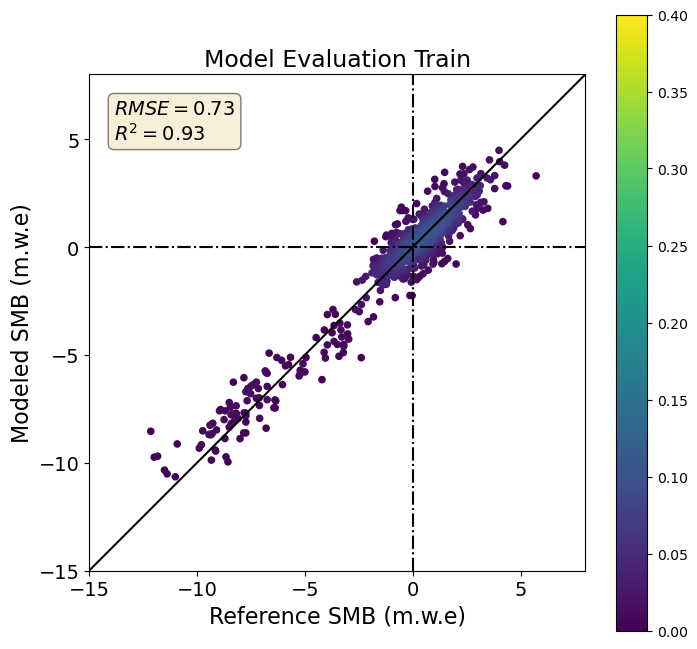

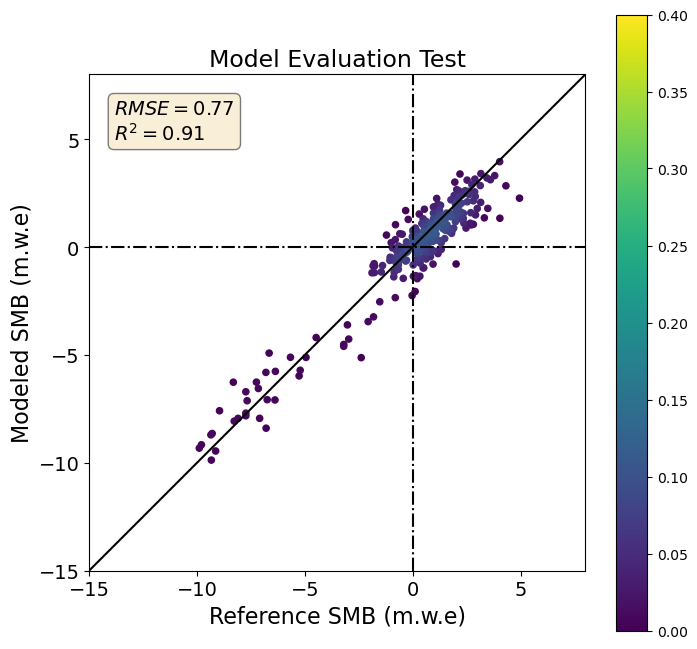

In [142]:
plot_prediction(y_train, elastic.predict(X_train_scaled), 'Train', n_toplot=5000)
plot_prediction(y_test, elastic.predict(X_test_scaled), 'Test', n_toplot=5000)

### XGBoost model

Using cross-validation with 10 folds, random split.

In [33]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold

In [122]:
# Iterator using KFold (no shuffling)
#kf = KFold(n_splits=5) # size of the test set will be 1/K (i.e. 1/n_splits); 1/5 = 0.2, 1/10 = 0.1
#kf.split(X_train, y_train)

#kf.get_n_splits(X_train, y_train)
#for train_index, test_index in kf.split(X_train, y_train):
# Loops over 3 iterations to have Train test stratified split
#     X_train1, X_test1 = X_train[train_index], X_train[test_index]
#     y_train1, y_test1 = y_train[train_index], y_train[test_index]

# Iterator using ShuffleSplit
#test_size = 0.2
#train_size = 0.8
#ss = ShuffleSplit(n_splits=10, test_size=test_size, train_size=train_size, random_state=5)
#ss.split(X_train, y_train)
#for train_index, test_index in ss.split(X_train, y_train):
#    print("%s" % (train_index))
#    print("%s" % (test_index))
#np.sum(np.isnan(y_test1))

In [136]:
# Grid search with range of hyperparameter values to find best performing
# parameter set.

xgb_model = xgb.XGBRegressor()

params = {'max_depth': [2, 3, 4, 5, 6, 7, 8],
          'n_estimators': [10, 20, 30, 40, 50],#, 100, 150, 200],#, 250, 300, 350, 400], # number of trees (too many = overfitting, too few = underfitting)
          'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]}

clf = GridSearchCV(xgb_model, 
                   params, 
                   cv=5, # Int or iterator
                   verbose=1, # Controls number of messages
                   n_jobs=4, # No of parallell jobs
                   scoring='neg_mean_squared_error', # Can use multiple metrics
                   refit=True, # Default True. For multiple metric evaluation, refit must be str denoting scorer to be used to find the best parameters for refitting the estimator.
                   return_train_score=True) # Default False. If False, cv_results_ will not include training scores.

# Fit model
clf.fit(X_train, y_train)

print(clf.best_score_)
print(clf.best_params_)

Fitting 5 folds for each of 245 candidates, totalling 1225 fits
-0.4433412950938303
{'learning_rate': 0.25, 'max_depth': 4, 'n_estimators': 50}


In [137]:
results = clf.cv_results_
results.keys()

# results['mean_test_score'].data.shape is 392 for 392 candidates
# results['param_n_estimators'].data.shape is 392 for 392 candidates
# results['split0_test_score'].data.shape is 392 for 392 candidates, split[i]_test_score created for i = 0:9 folds when using 10-fold cv

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_learning_rate', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [125]:
def plot_search_results(grid):
    """
    Params: 
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid.cv_results_
    grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

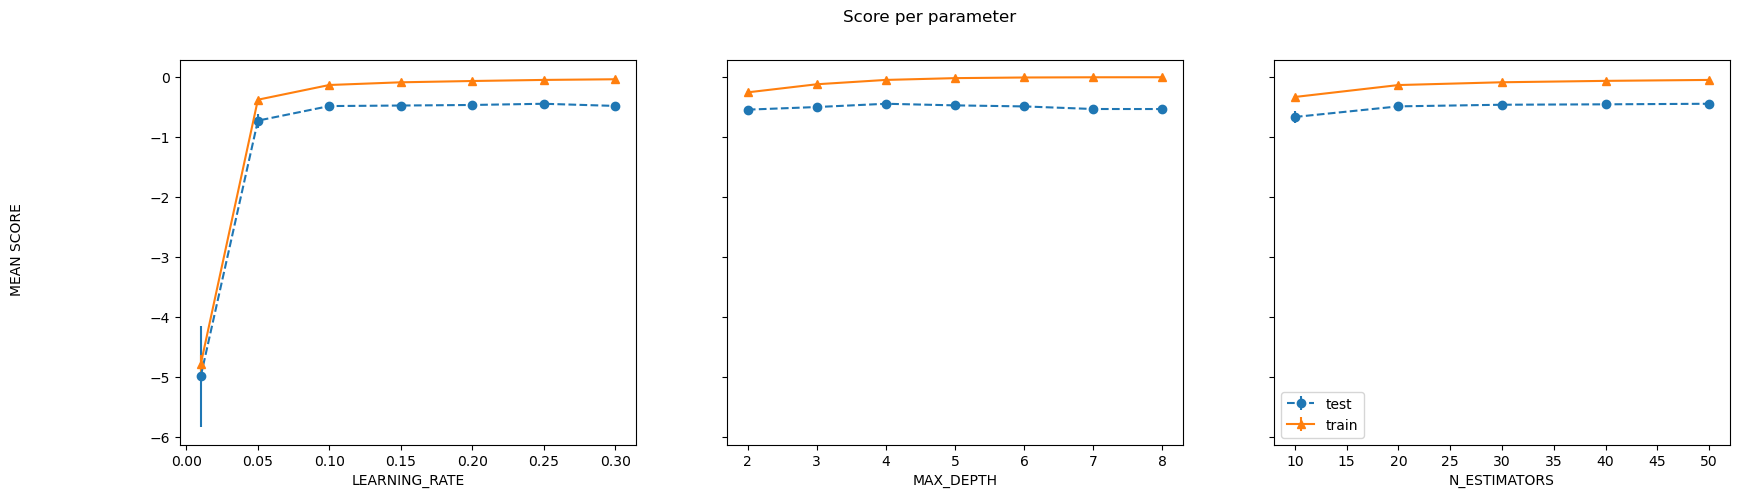

In [138]:
plot_search_results(clf)

In [75]:
#df_results_cv = pd.DataFrame.from_dict(results)

#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
#ax1.set_xlabel("n_estimators")
#ax1.set_ylabel("Score")
#ax2.set_xlabel("n_estimators")
#ax2.set_ylabel("Score")
#ax1.set_ylim(-3, 0)
#ax2.set_ylim(-0.55, -0.4)
#sns.boxplot(data=df_results_cv, x='param_n_estimators', y='mean_test_score', boxprops={"facecolor": (.4, .6, .8, .5)}, ax=ax1)
#sns.boxplot(data=df_results_cv, x='param_n_estimators', y='mean_test_score', boxprops={"facecolor": (.4, .6, .8, .5)}, ax=ax2)
#ax1.grid(True)
#ax2.grid(True)
#fig.suptitle("GridSearchCV evaluate n_estimators")

#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
#ax1.set_xlabel("learning_rate")
#ax1.set_ylabel("Score")
#ax2.set_xlabel("learning_rate")
#ax2.set_ylabel("Score")
#ax1.set_ylim(-3, 0)
#ax2.set_ylim(-0.55, -0.4)
#sns.boxplot(data=df_results_cv, x='param_learning_rate', y='mean_test_score', boxprops={"facecolor": (.4, .6, .8, .2)}, ax=ax1)
#sns.boxplot(data=df_results_cv, x='param_learning_rate', y='mean_test_score', boxprops={"facecolor": (.4, .6, .8, .2)}, ax=ax2)
#ax1.grid(True)
#ax2.grid(True)
#fig.suptitle("GridSearchCV evaluate learning_rate")

#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
#ax1.set_xlabel("max_depth")
#ax1.set_ylabel("Score")
#ax2.set_xlabel("max_depth")
#ax2.set_ylabel("Score")
#ax1.set_ylim(-3, 0)
#ax2.set_ylim(-0.55, -0.4)
#sns.boxplot(data=df_results_cv, x='param_max_depth', y='mean_test_score', boxprops={"facecolor": (.4, .6, .8, .7)}, ax=ax1)
#sns.boxplot(data=df_results_cv, x='param_max_depth', y='mean_test_score', boxprops={"facecolor": (.4, .6, .8, .7)}, ax=ax2)
#ax1.grid(True)
#ax2.grid(True)
#fig.suptitle("GridSearchCV evaluate max_depth")

In [139]:
#from sklearn.model_selection import cross_val_predict as cvp
from sklearn.model_selection import cross_val_score

params_best = clf.best_params_

xgb_model = xgb.XGBRegressor(learning_rate = params_best['learning_rate'], 
                            n_estimators = params_best['n_estimators'],
                            max_depth = params_best['max_depth'])

cvl = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

print('Cross validation scores: ', cvl)
print('Mean score: ', cvl.mean())
print('Standard deviation: ', cvl.std())

Cross validation scores:  [-0.39790356 -0.45497284 -0.39927452 -0.42806265 -0.5364929 ]
Mean score:  -0.4433412950938303
Standard deviation:  0.051092896799083506


In [ ]:
#y_pred = cvp(xgb_model, X_train, y_train, cv=kf, n_jobs = 2)#, fit_params = param)

#xgb_model.fit(X_train, y_train)

#y_pred = clf.best_estimator_.predict(X_train)

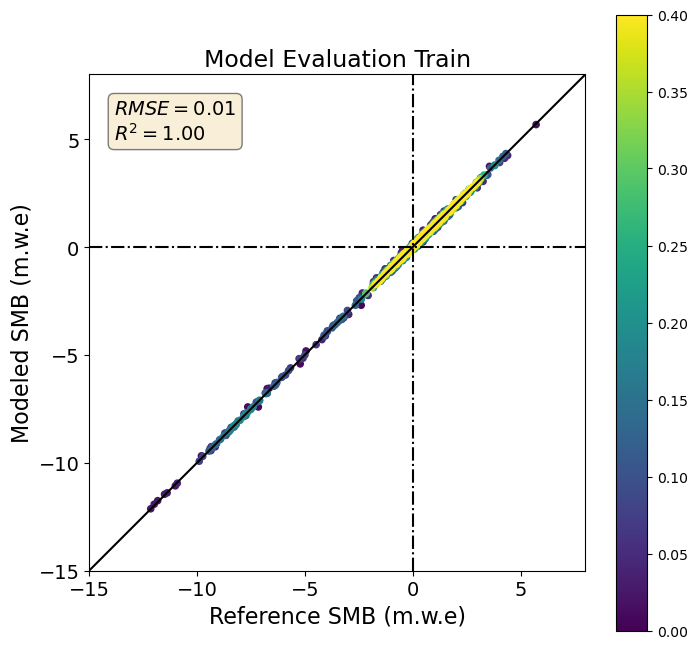

In [140]:
plot_prediction(y_train, y_pred, 'Train', n_toplot=5000)


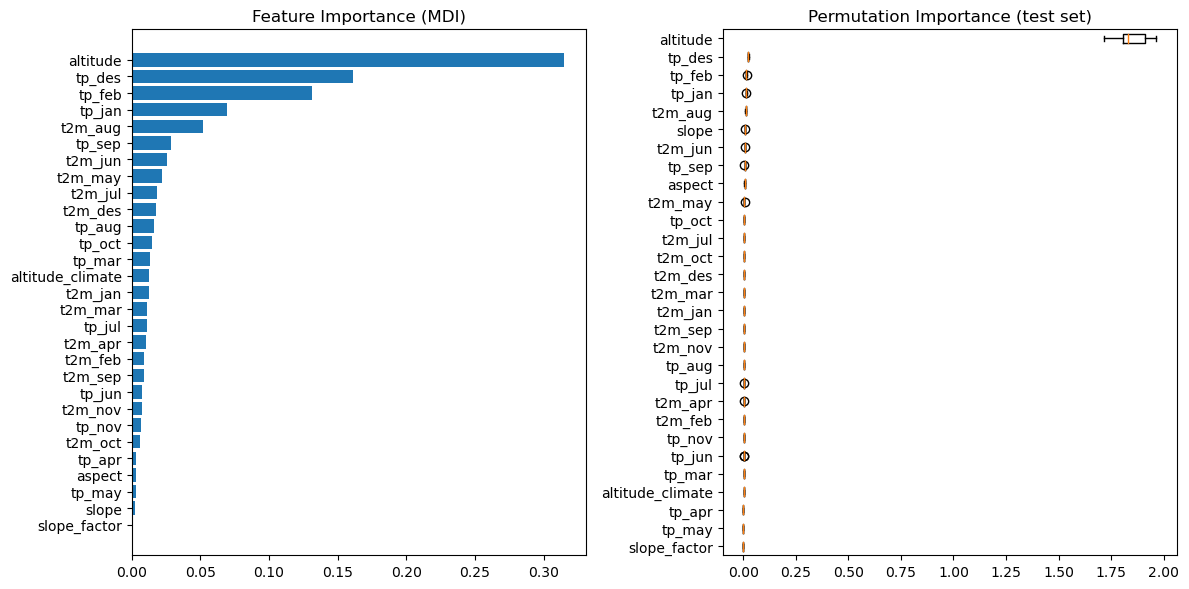

In [121]:
from sklearn.inspection import permutation_importance


xgb_model.fit(X_train, y_train)
feature_importance = xgb_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(df_train_X.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    xgb_model, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(df_train_X.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [135]:
#y_pred_test = cvp(xgb_model, X_test, y_test, cv=10, n_jobs = 2)#, fit_params = param)

#y_pred_test = clf.predict(X_test)

#plot_prediction(y_test, y_pred_test, 'Test', n_toplot=5000)

#cvl_test = cross_val_score(xgb_model, X_test, y_test, cv=10, scoring='neg_mean_squared_error')

#print('Cross validation scores: ', cvl_test)
#print('Mean score: ', cvl_test.mean())
#print('Standard deviation: ', cvl_test.std())